# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
QUESTION: Are the complaints of men more succesful than the general population? (for the same allegations?)

### Cleaning and EDA
Steps are specified below, as are the comparisons. In general, this is what we did.  
Cleaning:  
-Sorted out genders which were "Not described" into NaN. 
-Replaced 'board_disposition' with three general results (exonerated, substantiated, unsubstantiated).  
EDA:  
-Univariate Analysis on the data indicated that there are many more males in the dataset who made complaints (and that trans and gender non-conforming complaints make up an extremely small proportion of the complaints), most claims are unsubstantiated, and there are a lot more Abuse of Authority and Force complaints than any other category.  
-Bivariate Analysis indicated that each type of allegation had different distributions of substantiated, exonerated, and unsubstantiated claims. Grouping them together would likely lead to unrealistic results.  
-Aggregations on gender to allegation indicate that both males and females are most likely to report abuse of authority, but males see a lot more force allegations proportional to the population while females see more discourtesy. Aggregations on gender to result indicate priliminarily that males see more substantiated claims then females, but both ultimately see their claims unsubstantiated the most.  

### Assessment of Missingness
In this section I will analyze the missingness of "contact_reason" and "complainant_gender". I believe the missingness type of "contact_reason" is, in reality, not missing at random and based on "outcome_description". However, there are not enough cases of missing data in "contact_reason" to run a proper test considering that "outcome_description" has 24 separate categories. If there was a larger sample size we may have been able to come to a conclusion on the missingness type of "contact_reason". For "complainant_gender", I believe the missingness type is not missing at random. I believe the missingness is associated with "board_disposition".

### Hypothesis Test
NULL: Male complaints of allegations are equally likely to be substantiated compared to the rest of complaints.  
ALT: Male complaints are more likely to be substantiated for each allegation compared to the rest of the complaints.   
Sig: 95%  
By running a sample of the population of reports and comparing the proportion of substantiated claims to the proportion of male substantiated reports (for a specific type of allegation), we see p-values of this for each type of allegation:  
Abuse of Authority:0.009  
Discourtesy:0.13  
Force:0.136  
Offensive Language:0.535  
These p-values indicate that we can fail to reject the null hypothesis for discourtesy, force, and offensive language complaints. Since 0.009 < 0.05, we can reject the null and accept the alternate hypothesis for abuse of authority complaints, meaning that males are more likely to recieve substantiated results compared to the general complainant population.

# Code

In [892]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
import warnings
warnings.filterwarnings('ignore')

In [899]:
fp = os.path.join('nypd_data', 'allegations_202007271729.csv')
data = pd.read_csv(fp)

### Cleaning and EDA

#### CLEANING

Start with cleaning relevant columns (complainant_gender, board_disposition, allegation, fado_type). complainant_gender has "not described", which we can count as NaN.  

In [900]:
fixed_data = data[['complainant_gender', 'board_disposition', 'allegation', 'fado_type']]
fixed_data['complainant_gender'] = fixed_data['complainant_gender'].replace('Not described', np.NaN)
fixed_data = fixed_data.loc[fixed_data['complainant_gender'].notna()]

Group board_disposition into three categories without the parenthesis:  
exonerated (happened but didn't violate rules)  
unsubstantiated (not enough proof that it happened)  
substantiated (happened and rules were violated)  

In [901]:
fixed_data['final_dispo'] = fixed_data['board_disposition'].str.replace(r"\(.*\)","")

#### UNIVARIATE ANALYSIS

Start with the genders: How many of each gender have made complaints?

,allegation
complainant_gender,
Female,5021
Gender non-conforming,2
Male,24058
Transman (FTM),5
Transwoman (MTF),20


<AxesSubplot:>

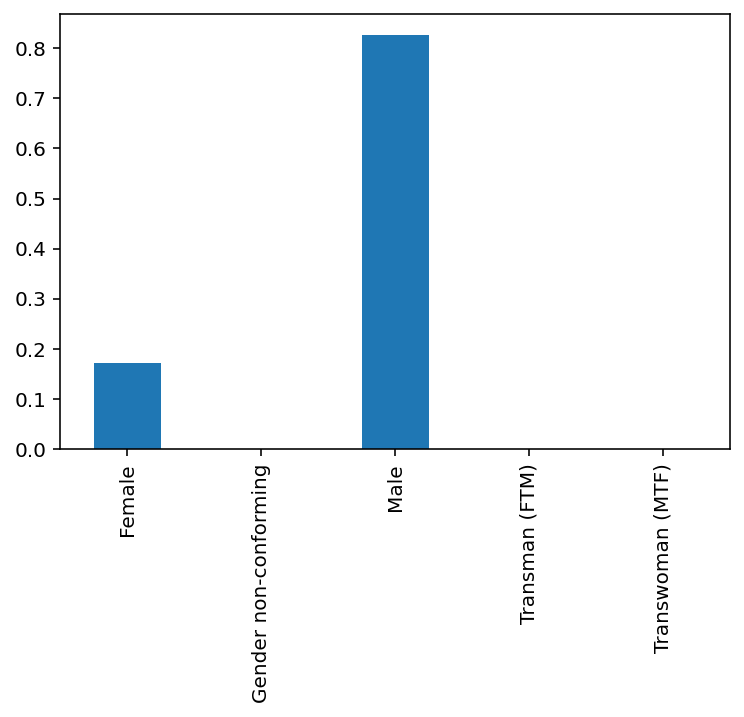

In [902]:
display(fixed_data.groupby(['complainant_gender']).count().drop(columns=['board_disposition', 'final_dispo', 'fado_type']))
fixed_data['complainant_gender'].value_counts(normalize=True).sort_index().plot(kind='bar')

Many more men have made complaints against the NYPD compared to women.

How about the general result of most dispositions?

,allegation
final_dispo,
Exonerated,7990
Substantiated,7198
Unsubstantiated,13918


<AxesSubplot:>

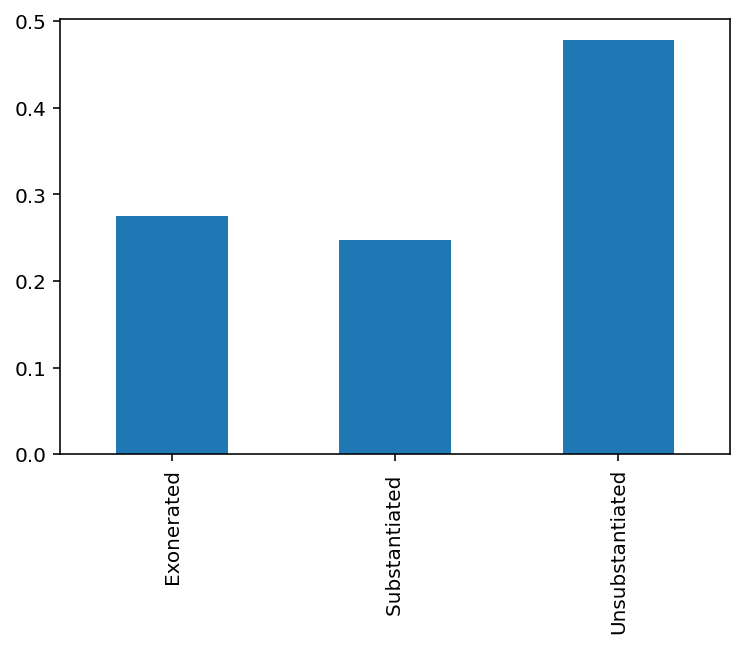

In [903]:
display(fixed_data.groupby('final_dispo').count().drop(columns=['complainant_gender', 'board_disposition', 'fado_type']))
fixed_data['final_dispo'].value_counts(normalize=True).sort_index().plot(kind='bar')

About a quarter of all complaints are either exonerated or substantiated, but close to half are unsubstantiated.

Finally, lets look at the kinds of allegations that these complaints have.

In [904]:
fixed_data['allegation'].value_counts()

Physical force                   4783
Word                             3845
Stop                             2262
Search (of person)               2008
Frisk                            1863
                                 ... 
Punch/Kick                          1
Threat of Arrest                    1
Gun Fired                           1
Questioned immigration status       1
Gun pointed                         1
Name: allegation, Length: 82, dtype: int64

But that's 115 types of allegations! Lets see if fado_type is better.

In [905]:
fixed_data['fado_type'].value_counts()

Abuse of Authority    17367
Force                  6834
Discourtesy            4251
Offensive Language      654
Name: fado_type, dtype: int64

Let's plot this instead!

,allegation
fado_type,
Abuse of Authority,17367
Discourtesy,4251
Force,6834
Offensive Language,654


<AxesSubplot:>

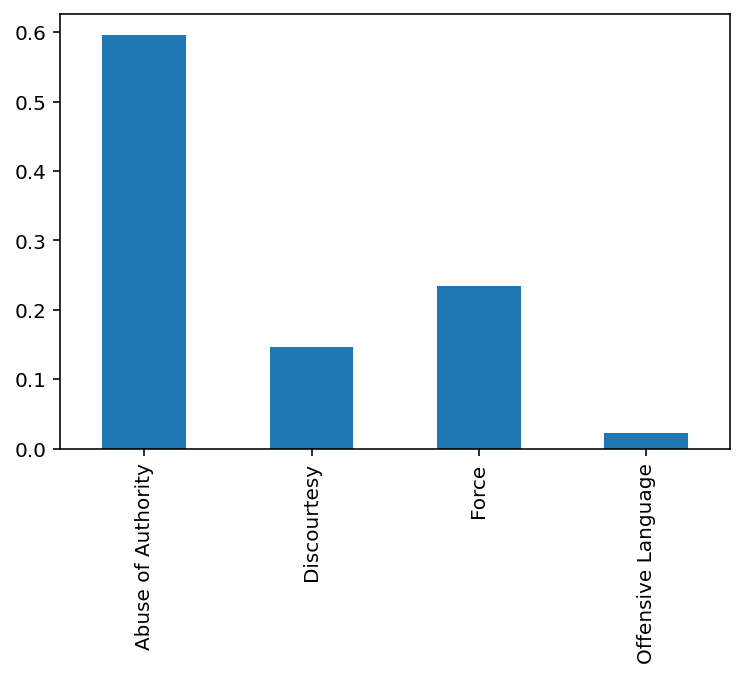

In [906]:
display(fixed_data.groupby('fado_type').count().drop(columns=['complainant_gender', 'board_disposition', 'final_dispo']))
fixed_data['fado_type'].value_counts(normalize=True).sort_index().plot(kind='bar')

Most complaints are for an abuse of authority, force and discourtesy are much less prevalent.  
Offensive language complaints are rare.

#### BIVARIATE ANALYSIS

Let's look at each allegation, and how successful the reports are per category. Are some allegations more likely to be substantiated?

In [907]:
for_piv = fixed_data.copy()[['fado_type', 'final_dispo']]
for_piv['counted'] = np.ones(len(fixed_data))
for_piv = for_piv.pivot_table(values='counted', columns='final_dispo', index='fado_type', aggfunc='sum')
display(for_piv)

final_dispo,Exonerated,Substantiated,Unsubstantiated
fado_type,,,
Abuse of Authority,4455.0,5416.0,7496.0
Discourtesy,214.0,914.0,3123.0
Force,3320.0,763.0,2751.0
Offensive Language,1.0,105.0,548.0


<AxesSubplot:xlabel='fado_type'>

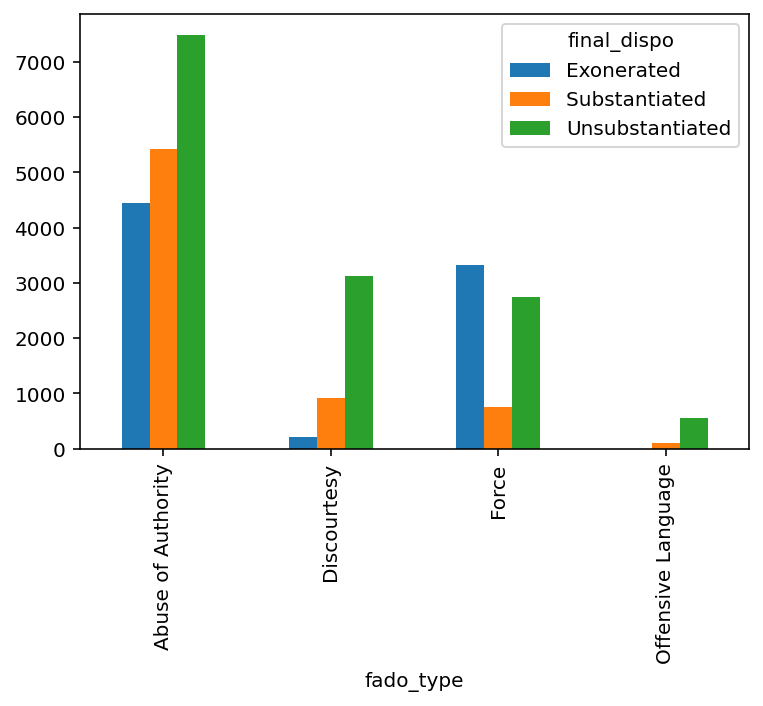

In [908]:
for_piv.plot.bar()

When grouping the dispositions by allegation, we see disturbing trends. 
While a good number of Abuse of Authority reports are actually substantiated(but still the majority are unsubstantiated), the same cannot be said about reports of force or discourtesy which see triple digit substantiated claims compared to mid 4-digit reports.
A majority of reports in force are actually EXONERATED, meaning that they are within rules of the department.

In [909]:
piv_ratio = for_piv.divide([abuse_total, disc_total, force_total, lang_total], axis=0)
display(piv_ratio)

final_dispo,Exonerated,Substantiated,Unsubstantiated
fado_type,,,
Abuse of Authority,0.256772,0.312161,0.432046
Discourtesy,0.050389,0.215211,0.735343
Force,0.485948,0.111680,0.402664
Offensive Language,0.001538,0.161538,0.843077


Ratios indicate the same problem. This means we should treat each allegation type DIFFERENTLY, as they have extremely varying distributions

#### INTERESTING AGGREGATIONS

In [910]:
total_female = len(fixed_data.loc[fixed_data['complainant_gender'] == "Female"])
total_male = len(fixed_data.loc[fixed_data['complainant_gender'] == "Male"])

What are the biggest complaints of each gender?

In [911]:
gender_allegation = fixed_data.groupby(['complainant_gender', 'fado_type'], as_index=False).count().drop(columns=['board_disposition', 'allegation',])
female_rat = gender_allegation.loc[gender_allegation['complainant_gender'] == 'Female']['final_dispo'] / total_female
male_rat = gender_allegation.loc[gender_allegation['complainant_gender'] == 'Male']['final_dispo'] / total_male
ratios = pd.concat([gender_allegation.loc[gender_allegation['complainant_gender'] == 'Female']['final_dispo'] / total_female, gender_allegation.loc[gender_allegation['complainant_gender'] == 'Male']['final_dispo'] / total_male])
gender_allegation = pd.concat([gender_allegation, ratios], axis=1)
display(gender_allegation)

,complainant_gender,fado_type,final_dispo,final_dispo
0,Female,Abuse of Authority,2744,0.546505
1,Female,Discourtesy,1018,0.202748
2,Female,Force,1046,0.208325
3,Female,Offensive Language,213,0.042422
4,Gender non-conforming,Abuse of Authority,2,NaN
5,Male,Abuse of Authority,14606,0.607116
6,Male,Discourtesy,3229,0.134217
7,Male,Force,5786,0.240502
8,Male,Offensive Language,437,0.018164
9,Transman (FTM),Abuse of Authority,1,NaN


Men and women both report abuse of authority the most, but while men see a disproportionate use of force over discourtesy complaints (and women see more discourtesy than men by proportion), women see both at basically the same rate. Both sexes see least issue with offensive language. Other genders (trans, non-conforming) see some complaints but are too marginal to be seen in the grand scope of the dataset (total of 27 complaints).

<AxesSubplot:>

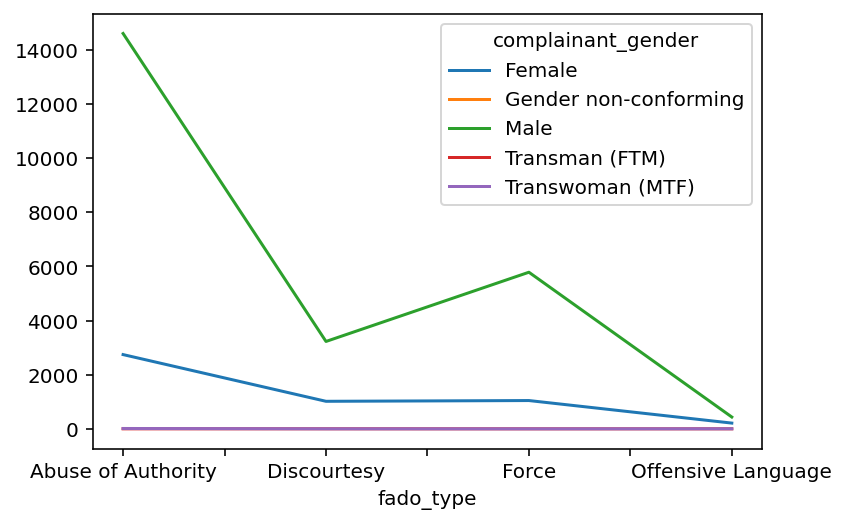

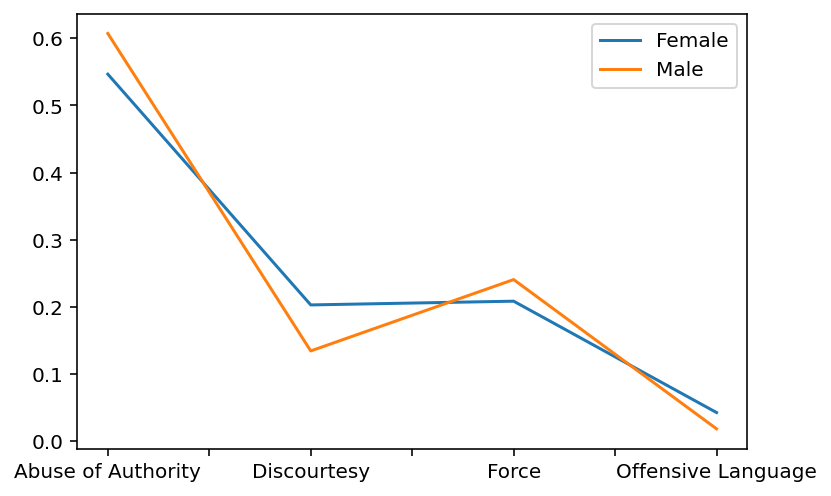

In [912]:
for_plot = fixed_data.copy()
for_plot['counted'] = np.ones(len(fixed_data))
gendered_lines = for_plot.pivot_table(values='counted', columns = 'complainant_gender', index='fado_type', aggfunc='sum')
gendered_lines.plot.line()

gender_graph = pd.concat([female_rat.reset_index(drop=True), male_rat.reset_index(drop=True)],
                         axis=1)
gender_graph.index = ['Abuse of Authority', 'Discourtesy', 'Force', 'Offensive Language']
gender_graph.columns = ['Female', 'Male']
gender_graph.plot.line()

How about gender to result? Does one gender see more success in reporting than the other (just in general)?

<AxesSubplot:xlabel='final_dispo'>

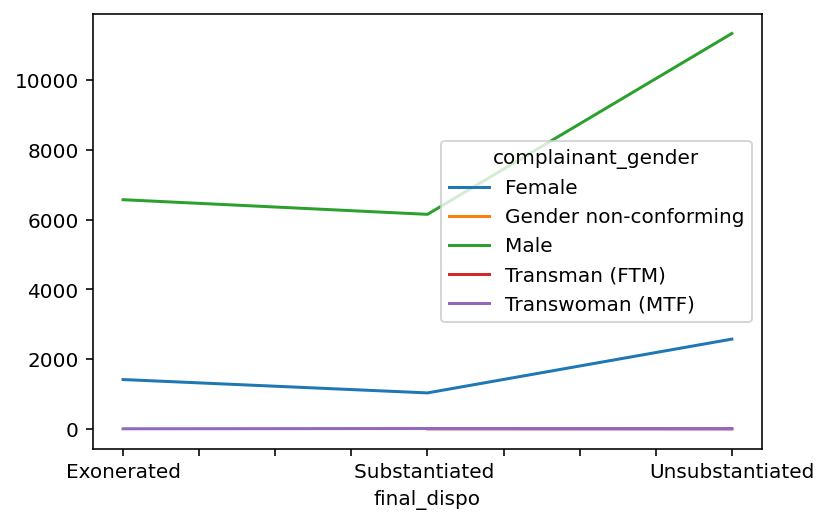

In [913]:
gender_result = fixed_data.copy().groupby(['complainant_gender', 'final_dispo'], as_index=False).count().drop(columns=['board_disposition','fado_type'])
for_plot = fixed_data.copy()
for_plot['counted'] = np.ones(len(fixed_data))
gendered_lines_2 = for_plot.pivot_table(values='counted', columns = 'complainant_gender', index='final_dispo', aggfunc='sum')
gendered_lines_2.plot.line()

This looks pretty generic. Men and women both see the most unsubstantiated complaints, while the least number of complaints seen by both genders are actually substantiated. The ratios are basically the same too! Women see less substantiated claims however (5% less than men total).

,complainant_gender,final_dispo,allegation,allegation
0,Female,Exonerated,1415,0.281816
1,Female,Substantiated,1032,0.205537
2,Female,Unsubstantiated,2574,0.512647
3,Gender non-conforming,Substantiated,2,NaN
4,Male,Exonerated,6571,0.273132
5,Male,Substantiated,6151,0.255674
6,Male,Unsubstantiated,11336,0.471195
7,Transman (FTM),Substantiated,2,NaN
8,Transman (FTM),Unsubstantiated,3,NaN
9,Transwoman (MTF),Exonerated,4,NaN


<AxesSubplot:>

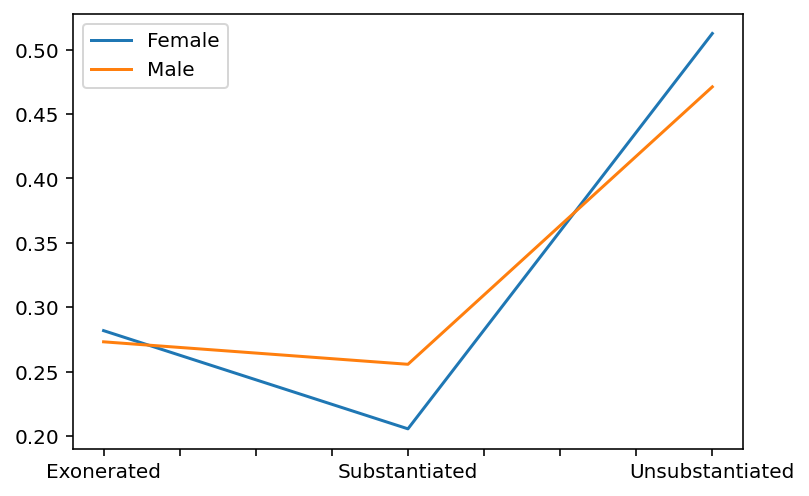

In [914]:
ratios2 = pd.concat([gender_result.loc[gender_result['complainant_gender'] == 'Female']['allegation'] / total_female, gender_result.loc[gender_result['complainant_gender'] == 'Male']['allegation'] / total_male])
gender_result = pd.concat([gender_result, ratios2], axis=1)
display(gender_result)
female_prop = (gender_result.loc[gender_result['complainant_gender'] == 'Female']['allegation'] / total_female).iloc[:,0]
male_prop = (gender_result.loc[gender_result['complainant_gender'] == 'Male']['allegation'] / total_male).iloc[:,0]
gender_graph = pd.concat([female_prop.reset_index(drop=True), male_prop.reset_index(drop=True)],
                         axis=1)
gender_graph.index = ['Exonerated', 'Substantiated', 'Unsubstantiated']
gender_graph.columns = ['Female', 'Male']
gender_graph.plot.line()

With all of this data in mind, the best way to test this data is to perform a permutation test on 4 categories.
One for each type of allegation, and see how each test performs when we randomly sample the genders.
(Do the success rates of complaints change when we randomize the genders?)




### Assessment of Missingness

In [885]:
def tvd(dist1, dist2):
    return 0.5*(np.sum(np.abs(dist1 - dist2)))

In [886]:
grouped_data=data.copy()
grouped_data["board_disposition"]=grouped_data['board_disposition'].str.replace(r"\(.*\)","")

col1="contact_reason"
col2="board_disposition"

mod_data=grouped_data[col1].isnull().replace({True: 'Missing', False: 'Present'})
mod_data2=grouped_data.copy()
mod_data2[col1]=mod_data
mod_data2 = mod_data2[[col1, col2, 'allegation']]
pivoted=mod_data2.pivot_table(index=col1,columns=col2,aggfunc="count")
pivoted

missing=pivoted.iloc[0]/pivoted.iloc[0].sum()
present=pivoted.iloc[1]/pivoted.iloc[1].sum()
obs=tvd(missing,present)
p=0
for _ in range(1000):
    shuffled = grouped_data[col1].sample(frac=1.0).reset_index(drop=True)
    sim_data=grouped_data.copy()
    sim_data[col1]=shuffled.isnull().replace({True: 'Missing', False: 'Present'})
    sim_data=sim_data[[col1, col2, 'allegation']]
    sim_pivoted=sim_data.pivot_table(index=col1,columns=col2,aggfunc="count")
    sim_missing=sim_pivoted.iloc[0]/pivoted.iloc[0].sum()
    sim_present=sim_pivoted.iloc[1]/pivoted.iloc[1].sum()
    sim = tvd(sim_missing,sim_present)
    if sim>obs:
        p+=1
print(col1, col2, p/1000)

contact_reason board_disposition 0.516


A p-value of 0.516 in this permutation test means that we fail to reject the null hypothesis that 
the missingness of the data on contact reason is missing at random. In the context of our 
analysis, this means that contact reason data may be missing at random, which means that the 
missingness can be ignored when performing analyses.

In [887]:
col1="contact_reason"
col2="complainant_age_incident"
mod_data=grouped_data[col1].isnull().replace({True: 'Missing', False: 'Present'})
mod_data2=grouped_data.copy()
mod_data2[col1]=mod_data
mod_data2 = mod_data2[[col1, col2, 'allegation']]
pivoted=mod_data2.pivot_table(index=col1,columns=col2,aggfunc="count")
pivoted

missing=pivoted.iloc[0]/pivoted.iloc[0].sum()
present=pivoted.iloc[1]/pivoted.iloc[1].sum()
obs=tvd(missing,present)
p=0
for _ in range(1000):
    shuffled = grouped_data[col1].sample(frac=1.0).reset_index(drop=True)
    sim_data=grouped_data.copy()
    sim_data[col1]=shuffled.isnull().replace({True: 'Missing', False: 'Present'})
    sim_data=sim_data[[col1, col2, 'allegation']]
    sim_pivoted=sim_data.pivot_table(index=col1,columns=col2,aggfunc="count")
    sim_missing=sim_pivoted.iloc[0]/pivoted.iloc[0].sum()
    sim_present=sim_pivoted.iloc[1]/pivoted.iloc[1].sum()
    sim = tvd(sim_missing,sim_present)
    if sim>obs:
        p+=1
print(col1, col2, p/1000)

contact_reason complainant_age_incident 0.198


A p-value of 0.198 in this permutation test means that we fail to reject the null hypothesis that 
the missingness of the data on contact reason is missing at random relative to complainant age at 
the time of the incident. In the context of our analysis, this means that contact reason data may 
be missing at random, which means that the missingness can be ignored when performing analyses. 
We can be confident that contact reason's missingness is not associated with the ages of the 
complainants at the time of the incident.

In [888]:
mod_data=grouped_data["complainant_gender"].isnull().replace({True: 'Missing', False: 'Present'})
mod_data2=grouped_data.copy()
mod_data2["complainant_gender"]=mod_data
pivoted=mod_data2.pivot_table(index="complainant_gender",columns="board_disposition",aggfunc="count")
missing=pivoted.iloc[0]/pivoted.iloc[0].sum()
present=pivoted.iloc[1]/pivoted.iloc[1].sum()
obs=tvd(missing,present)
p=0
for _ in range(1000):
    shuffled = grouped_data["complainant_gender"].sample(frac=1.0).reset_index(drop=True)
    sim_data=grouped_data.copy()
    sim_data["complainant_gender"]=shuffled.isnull().replace({True: 'Missing', False: 'Present'})
    sim_pivoted=sim_data.pivot_table(index="complainant_gender",columns="board_disposition",aggfunc="count")
    sim_missing=sim_pivoted.iloc[0]/pivoted.iloc[0].sum()
    sim_present=sim_pivoted.iloc[1]/pivoted.iloc[1].sum()
    sim = tvd(sim_missing,sim_present)
    if sim>obs:
        p+=1
p/1000

0.0

A p-value of 0.0 in this permutation test means that we reject the null hypothesis that the 
missing data on the complainants' gender in our observations was a result of random chance. In
the context of our data and analyses, this means that there is a bias in using this dataset, 
because the present data has a much higher rate of unsubstantiated allegations than our missing 
data. This leads us to believe that the data is not missing at random.

### Hypothesis Test

Hypotheses:  
NULL: Male complaints of allegations are equally likely to be substantiated compared to the rest of complaints.  
ALT: Male complaints are more likely to be substantiated for each allegation compared to the rest of the complaints.   
Significance Level: 95%

In [919]:
#Function to simulate each allegation type, return p_values
def simf(allegation):
    allegation = fixed_data.copy().loc[fixed_data['fado_type'] == allegation]
    male = allegation.loc[(allegation['complainant_gender'] == 'Male')]
    observed = male.loc[male['final_dispo'] != 'Exonerated']
    observed = observed.loc[observed['final_dispo'] != 'Unsubstantiated']
    observed = len(observed) / len(male)
    props = []
    for x in range(1000):
        sample = allegation.copy().sample(n=len(male), replace=True)
        sample = sample.loc[sample['final_dispo'] != 'Exonerated']
        sample = sample.loc[sample['final_dispo'] != 'Unsubstantiated']
        sample = len(sample) / len(male)
        props = np.append(props, sample)
    p_val = np.count_nonzero(np.array(props) >= observed)/1000
    return p_val

In [920]:
print('Abuse of Authority:' + str(simf('Abuse of Authority')))
print('Discourtesy:' + str(simf('Discourtesy')))
print('Force:' + str(simf('Force')))
print('Offensive Language:' + str(simf('Offensive Language')))

Abuse of Authority:0.009
Discourtesy:0.13
Force:0.136
Offensive Language:0.535


These p-values mean that we fail to reject the null hypothesis that male complaints are more likely to be substantiated than the rest of complaints for allegations of discourtesy, force, and offensive language. For abuse of authority complaints, since 0.009 < 0.05, we can reject the null hypothesis and accept the alternate hypothesis that male complaints are more likely to be substantiated compared to female complaints.